In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
# !wget https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Train.zip
# !unzip CAX_Characters_Train.zip

In [0]:
path = Path('/content/')

In [0]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/data'),
 PosixPath('/content/models'),
 PosixPath('/content/CAX_Characters_Train'),
 PosixPath('/content/CAX_Characters_Train.zip')]

In [0]:
np.random.seed(999)
tfms = get_transforms(do_flip=False,flip_vert = False,max_zoom=1.4)
data = ImageDataBunch.from_folder(path,valid_pct = 0.01,train='CAX_Characters_Train', seed = 99, ds_tfms=tfms, size=320).normalize(imagenet_stats)

#data = ImageDataBunch.from_folder(path,valid_pct = 0.2,train='CAX_Characters_Train' size=320)

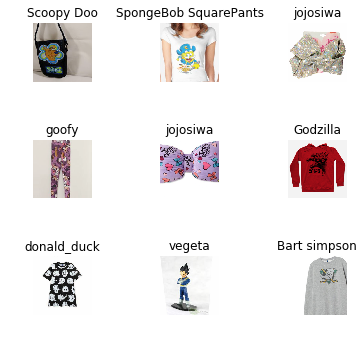

In [0]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
print(data.classes)
len(data.classes),data.c

['Baloo', 'Bart simpson', 'Charlie brown', 'Chicken_little', 'Cinderella', 'Godzilla', 'Goku_1', 'John Cena', 'R2-D2', 'Roman Reigns', 'Scoopy Doo', 'SpongeBob SquarePants', 'Tom and Jerry', 'Winnie the poo', 'angrybirds', 'ben', 'bulbasaur', 'charizard', 'charmander', 'darth_vader', 'disney_princes', 'donald_duck', 'goofy', 'han-solo', 'harry_potter', 'hellokitty', 'itachi', 'jojosiwa', 'kakashi', 'marilyn_monroe', 'mickey_mouse', 'minions', 'naruto', 'pikachu', 'pokemon', 'popeye', 'power_rangers', 'squirtle', 'teenage_mutant', 'toy_story_characters', 'vampirina', 'vegeta']


(42, 42)

In [0]:
learn1 = cnn_learner(data, models.resnet50, metrics=accuracy).to_fp16()
learn2 = cnn_learner(data, models.resnet152, metrics=accuracy).to_fp16()

In [0]:
learn1.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.400108,1.611862,0.560606,03:10
1,1.466495,1.014165,0.696970,03:05
2,0.976284,0.845623,0.742424,03:05
3,0.723718,0.806354,0.772727,03:04


In [0]:
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.298390,1.383518,0.621212,04:46
1,1.315307,0.983854,0.742424,04:46
2,0.855926,0.823185,0.757576,04:46
3,0.608177,0.789364,0.742424,04:46


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

In [0]:
learn1.lr_find()
learn1.recorder.plot()

In [0]:
learn2.lr_find()
learn2.recorder.plot()

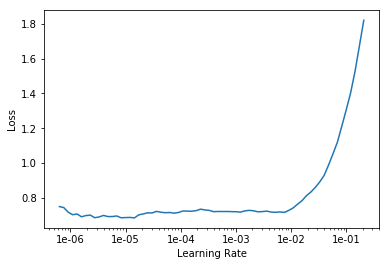

In [0]:
learn1.recorder.plot()

In [0]:
learn1.unfreeze()
learn1.fit_one_cycle(13, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.709820,0.939905,0.735426,01:26
1,0.654940,0.922991,0.742900,01:25
2,0.417812,0.731994,0.799701,01:26
3,0.210842,0.662946,0.837818,01:25
4,0.119394,0.642771,0.837818,01:25


In [0]:
learn2.unfreeze()
learn2.fit_one_cycle(13, max_lr=slice(1e-3))

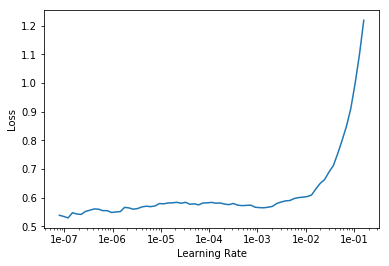

In [0]:
learn2.recorder.plot()

In [0]:
learn3.unfreeze()
learn3.fit_one_cycle(13, max_lr=slice(5e-5,5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.579313,0.586014,0.863636,01:40
1,0.493339,0.512544,0.848485,01:40
2,0.409191,0.587786,0.772727,01:39
3,0.338867,0.482513,0.848485,01:39
4,0.293041,0.706405,0.833333,01:39
5,0.289768,0.585016,0.848485,01:40
6,0.234036,0.749147,0.787879,01:40
7,0.207547,0.613930,0.833333,01:40
8,0.161935,0.511935,0.863636,01:41
9,0.117375,0.461325,0.878788,01:41


In [0]:
#learn.save('max_cc_88')

In [0]:
#learn.fit_one_cycle(3, max_lr=slice(3e-7,3e-4))

In [0]:
# interp = ClassificationInterpretation.from_learner(learn)

# losses,idxs = interp.top_losses()

# len(data.valid_ds)==len(losses)==len(idxs)

epoch	train_loss	valid_loss	accuracy	time
0	0.336410	0.927190	0.737550	01:56
1	0.375802	0.821575	0.774900	01:57
2	0.225349	0.664727	0.814741	01:59
3	0.126733	0.646136	0.823705	01:59

In [0]:
# interp.plot_top_losses(9, figsize=(15,11))

In [0]:
# interp.most_confused(min_val=3)

In [0]:
# !wget https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Test.zip
# !unzip CAX_Characters_Test.zip

In [0]:
ordered=True

In [0]:
test_imgs = (path/'test_characters_new/').ls()
#test_imgs.sort(key=lambda x: x.stem)
data.add_test(test_imgs) 
learn1.data = data
predictions_1, *_ = learn1.get_preds(DatasetType.Test)


In [0]:
learn2.data = data
predictions_2, *_ = learn2.get_preds(DatasetType.Test)

In [0]:
for i in range(0,42):
    print(np.corrcoef(predictions_1[:][i],predictions_2[:][i]))

[0.145457 1.      ]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[0.139548 1.      ]
[1. 1.]
[1. 1.]
[0.993988 1.      ]
[1. 1.]
[0.999999 1.      ]
[-0.016651  1.      ]
[0.999992 1.      ]
[0.556275 1.      ]
[0.999998 1.      ]
[1. 1.]
[0.999819 1.      ]
[0.912512 1.      ]
[0.999541 1.      ]
[0.7949 1.    ]
[0.999051 1.      ]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[0.99986 1.     ]
[0.551514 1.      ]
[1. 1.]
[1. 1.]
[1. 1.]
[0.984392 1.      ]
[1. 1.]
[0.77866 1.     ]
[1. 1.]
[0.199571 1.      ]
[0.998814 1.      ]


In [0]:
np.average(labels1==labels2)

0.8977730077810572

In [0]:
labels1 = np.argmax(predictions_1, 1)
labels2 = np.argmax(predictions_2, 1)

In [0]:
predictions = predictions_1*0.3 + predictions_2*0.7

In [0]:
labels = np.argmax(predictions, 1)

In [0]:
lable_map = dict(zip(list(range(0,42)),data.classes))

In [0]:
a = []
for i in list((test_imgs)):
  a.append((str(i).split('/')[3]))

In [0]:
predictions = pd.DataFrame(data={'Filename':a,'lable':list(np.array(labels))})

In [0]:
predictions.head(1)

,Filename,lable
0,Cax_test2130.jpg,28


In [0]:
predictions['Prediction'] = predictions['lable'].map(lable_map)

In [0]:
fnl =  predictions[['Filename','Prediction']]

In [0]:
fnl.head(10)

,Filename,Prediction
0,Cax_test2130.jpg,kakashi
1,Cax_test3554.jpg,vampirina
2,Cax_test27.jpg,angrybirds
3,Cax_test2253.jpg,marilyn_monroe
4,Cax_test461.jpg,charizard
5,Cax_test423.jpg,charizard
6,Cax_test1487.jpg,harry_potter
7,Cax_test1546.jpg,hellokitty
8,Cax_test1440.jpg,harry_potter
9,Cax_test597.jpg,charmander


In [0]:
learn1.save('semi_train_v1')
learn2.save('semi_train_v2')

In [0]:
from google.colab import files

fnl.to_csv('fnl_part4.csv',index = False)
files.download('fnl_part4.csv')

In [0]:
open_image(path/'test_characters_new/Cax_test1487.jpg')

FileNotFoundError: ignored